# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [172]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from newsapi import NewsApiClient
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Alex\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [173]:
# Read your api key environment variable
load_dotenv()
news_api_key = os.getenv("news_api_key")

In [174]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=news_api_key)

In [175]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(q="bitcoin", language="en")
bitcoin_headlines


{'status': 'ok',
 'totalResults': 6718,
 'articles': [{'source': {'id': 'bbc-news', 'name': 'BBC News'},
   'author': 'https://www.facebook.com/bbcnews',
   'title': "Indian PM Modi's Twitter hacked with bitcoin tweet",
   'description': "The Indian prime minister's account had a message stating that bitcoin would be distributed to citizens.",
   'url': 'https://www.bbc.co.uk/news/world-asia-india-59627124',
   'urlToImage': 'https://ichef.bbci.co.uk/news/1024/branded_news/5998/production/_122063922_mediaitem122063921.jpg',
   'publishedAt': '2021-12-12T10:59:57Z',
   'content': "Image source, AFP via Getty Images\r\nImage caption, Modi has has more than 70 million Twitter followers\r\nIndian Prime Minister Narendra Modi's Twitter account was hacked with a message saying India ha… [+854 chars]"},
  {'source': {'id': None, 'name': 'New York Times'},
   'author': 'Corey Kilgannon',
   'title': 'Why New York State Is Experiencing a Bitcoin Boom',
   'description': 'Cryptocurrency miners a

In [176]:
# Fetch the Ethereum news articles
eth_headlines = newsapi.get_everything(q="ethereum", language="en")
eth_headlines

{'status': 'ok',
 'totalResults': 2903,
 'articles': [{'source': {'id': 'wired', 'name': 'Wired'},
   'author': 'Dan Goodin, Ars Technica',
   'title': 'A Software Bug Let Hackers Drain $31M From a Crypto Service',
   'description': "An attacker exploited a vulnerability in MonoX Finance's smart contract to inflate the price of its digital token and then cash out.",
   'url': 'https://www.wired.com/story/hackers-drain-31-million-from-crypto-service/',
   'urlToImage': 'https://media.wired.com/photos/61a8e032b7391d86bbd9a4c4/191:100/w_1280,c_limit/Sec_ars_GettyImages-1324841380.jpg',
   'publishedAt': '2021-12-02T23:45:00Z',
   'content': 'Blockchain startup MonoX Finance said on Wednesday that a hacker stole $31 million by exploiting a bug in software the service uses to draft smart contracts.\r\nThis story originally appeared on Ars Te… [+4372 chars]'},
  {'source': {'id': None, 'name': 'Entrepreneur'},
   'author': 'Amanda Breen',
   'title': "Budweiser's First NFT Collection Sells O

In [177]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
btc_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_df = btc_df[cols]

btc_df.head()

,date,text,compound,positive,negative,neutral
0,2021-12-12,"Image source, AFP via Getty Images\r\nImage ca...",-0.4019,0.000,0.078,0.922
1,2021-12-06,The plant opening northeast of Niagara Falls t...,0.0000,0.000,0.000,1.000
2,2021-12-01,"Earlier this year, Nothing released a pair of ...",0.5106,0.099,0.000,0.901
3,2021-12-23,Dec 23 (Reuters) - The U.S. Securities and Exc...,0.5859,0.142,0.000,0.858
4,2021-12-12,People aren't done hijacking major politicians...,0.5267,0.112,0.000,0.888


In [178]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiments = []

for article in eth_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_df = eth_df[cols]

eth_df.head()

,date,text,compound,positive,negative,neutral
0,2021-12-02,Blockchain startup MonoX Finance said on Wedne...,-0.0516,0.074,0.079,0.847
1,2021-11-30,"On Monday, Budweiser joined the non-fungible t...",-0.1531,0.000,0.045,0.955
2,2021-12-01,"Earlier this year, Nothing released a pair of ...",0.5106,0.099,0.000,0.901
3,2021-12-10,White Castle double cheeseburger.Erin McDowell...,0.0000,0.000,0.000,1.000
4,2021-12-10,"Nicholas Merten , an expert in cryptography, p...",0.4939,0.119,0.000,0.881


In [179]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.098585,0.051200,0.024400,0.924350
std,0.328699,0.064077,0.034561,0.070277
min,-0.401900,0.000000,0.000000,0.791000
25%,-0.006450,0.000000,0.000000,0.880500
50%,0.000000,0.000000,0.000000,0.922500
75%,0.471750,0.116250,0.062000,1.000000
max,0.585900,0.158000,0.080000,1.000000


In [180]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,20.00000,20.00000,20.000000,20.000000
mean,0.09956,0.04805,0.029450,0.922450
std,0.28913,0.05009,0.043193,0.074155
min,-0.58490,0.00000,0.000000,0.729000
25%,-0.01045,0.00000,0.000000,0.888500
50%,0.00000,0.05050,0.000000,0.927500
75%,0.36120,0.07825,0.076000,1.000000
max,0.51060,0.15500,0.115000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin (.051200 vs 0.04805)

Q: Which coin had the highest compound score?

A: Bitcoin (.5859 vs .5106)

Q. Which coin had the highest positive score?

A: Bitcoin (.158 vs .155)

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [181]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import reuters, stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [182]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Create tokenizer text
btc_corpus = []
for i, row in enumerate(btc_df['text']):
    btc_corpus.append(btc_df['text'][i])


eth_corpus = []
for i, row in enumerate(eth_df['text']):
    eth_corpus.append(eth_df['text'][i])

In [183]:


# Complete the tokenizer function
def process_text(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return output


In [184]:
# Create a new tokens column for Bitcoin
btc_tokens = tokenizer(btc_article)
btc_tokens

['posted',
 'bitcoin',
 'shed',
 'fifth',
 'value',
 'saturday',
 'combination',
 'profittaking',
 'macroeconomic',
 'concern',
 'triggered',
 'nearly',
 'billion',
 'dollar',
 'worth',
 'selling',
 'across',
 'cryptocurrencies',
 'fred',
 'char']

In [185]:
# Create a new tokens column for Ethereum
eth_tokens = tokenizer(eth_article)
eth_tokens

['decentralized',
 'finance',
 'defi',
 'global',
 'financial',
 'system',
 'thats',
 'available',
 'blockchains',
 'public',
 'often',
 'ethereumdefi',
 'stand',
 'decentralized',
 'finance',
 'simple',
 'word',
 'stand',
 'char']

---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [186]:
from collections import Counter
from nltk import ngrams

In [187]:
# Fetch the Bitcoin news articles
btc_df

,date,text,compound,positive,negative,neutral
0,2021-12-12,"Image source, AFP via Getty Images\r\nImage ca...",-0.4019,0.000,0.078,0.922
1,2021-12-06,The plant opening northeast of Niagara Falls t...,0.0000,0.000,0.000,1.000
2,2021-12-01,"Earlier this year, Nothing released a pair of ...",0.5106,0.099,0.000,0.901
3,2021-12-23,Dec 23 (Reuters) - The U.S. Securities and Exc...,0.5859,0.142,0.000,0.858
4,2021-12-12,People aren't done hijacking major politicians...,0.5267,0.112,0.000,0.888
5,2021-12-12,Representation of cryptocurrency bitcoin is se...,0.0000,0.000,0.000,1.000
6,2021-12-06,(Reuters) - A computer scientist who has claim...,0.0000,0.000,0.000,1.000
7,2021-12-01,"Available for the same price, $99, on December...",0.1280,0.043,0.000,0.957
8,2021-12-04,"Dec 4 (Reuters) - Bitcoin dropped 8.4% to $49,...",-0.3818,0.000,0.080,0.920
9,2021-12-04,Posted \r\nBitcoin shed a fifth of its value o...,0.5106,0.158,0.000,0.842


In [188]:
btc_df.tail()

,date,text,compound,positive,negative,neutral
15,2021-12-09,Posted \r\nA computer scientist who has claime...,0.0000,0.000,0.000,1.000
16,2021-12-08,"In a disclosure that should surprise no one, t...",0.4588,0.147,0.062,0.791
17,2021-11-30,Bitcoin and other cryptocurrencies have reboun...,-0.0258,0.052,0.055,0.892
18,2021-12-11,"""Bitcoin mining is a process of competitively ...",0.2500,0.129,0.074,0.797
19,2021-12-06,Is Satoshi's identity finally revealed?\r\nGet...,0.0000,0.000,0.000,1.000


In [189]:

# Define Bigram counter function
def bigram_counter(btc_corpus): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(corpus)
    processed = tokenizer(big_string)
    bigrams = ngrams(processed, n=2)
    top_10 = dict(Counter(bigrams).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['bigram', 'count'])

# Generate the Bitcoin N-grams where N=2
bigram_counter(btc_df)

,bigram,count
0,"(twitter, account)",3
1,"(prime, minister)",2
2,"(minister, narendra)",2
3,"(narendra, modis)",2
4,"(modis, twitter)",2
5,"(image, source)",1
6,"(source, afp)",1
7,"(afp, via)",1
8,"(via, getty)",1
9,"(getty, imagesimage)",1


In [190]:
# Generate the Ethereum N-grams where N=2
bigram_counter(eth_df)

,bigram,count
0,"(twitter, account)",3
1,"(prime, minister)",2
2,"(minister, narendra)",2
3,"(narendra, modis)",2
4,"(modis, twitter)",2
5,"(image, source)",1
6,"(source, afp)",1
7,"(afp, via)",1
8,"(via, getty)",1
9,"(getty, imagesimage)",1


In [191]:
# Function token_count generates the top 10 words for a given coin
def word_counter(corpus): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(corpus)
    processed = process_text(big_string)
    top_10 = dict(Counter(processed).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['word', 'count'])

In [192]:
# Use token_count to get the top 10 words for Bitcoin
word_counter(btc_corpus)

,word,count
0,char,19
1,bitcoin,17
2,ha,8
3,reuters,6
4,cryptocurrency,6
5,twitter,4
6,computer,4
7,scientist,4
8,inventor,4
9,prevailed,4


In [193]:
# Use token_count to get the top 10 words for Ethereum
word_counter(eth_corpus)

,word,count
0,char,19
1,bitcoin,8
2,cryptocurrency,4
3,finance,3
4,digital,3
5,beer,3
6,year,3
7,ear,3
8,earbuds,3
9,white,3


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [194]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

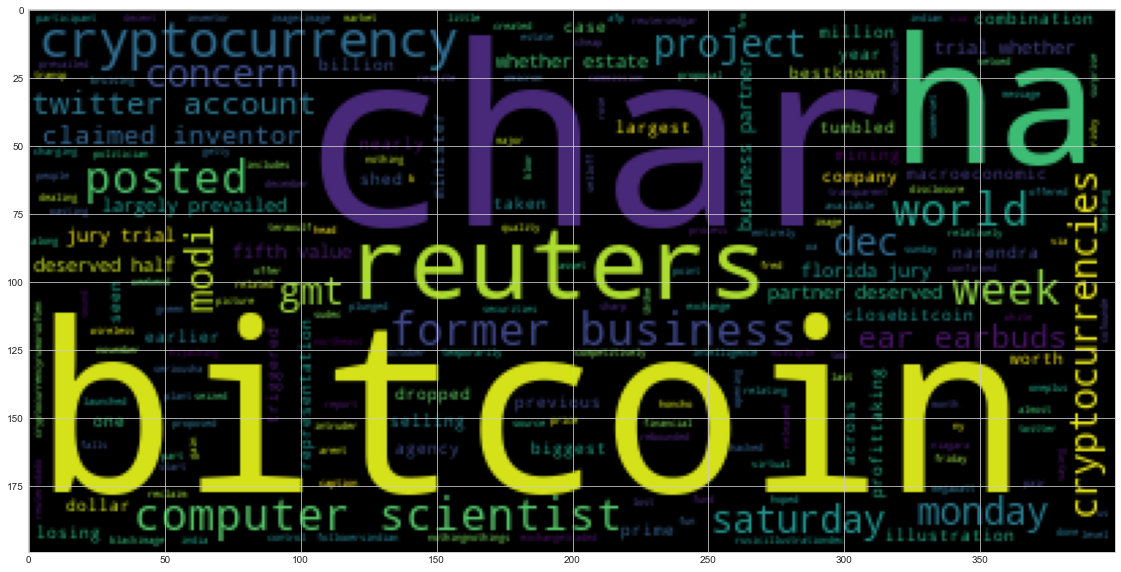

In [195]:
# Generate the Bitcoin word cloud
btc_string = ' '.join(btc_corpus)
btc_input_words = process_text(btc_string)

def listToString(s): 
    
    str1 = " " 
    
    return (str1.join(s))
        
btc_input = listToString(btc_input_words)
btc_wc = WordCloud().generate(btc_input)
plt.imshow(btc_wc)

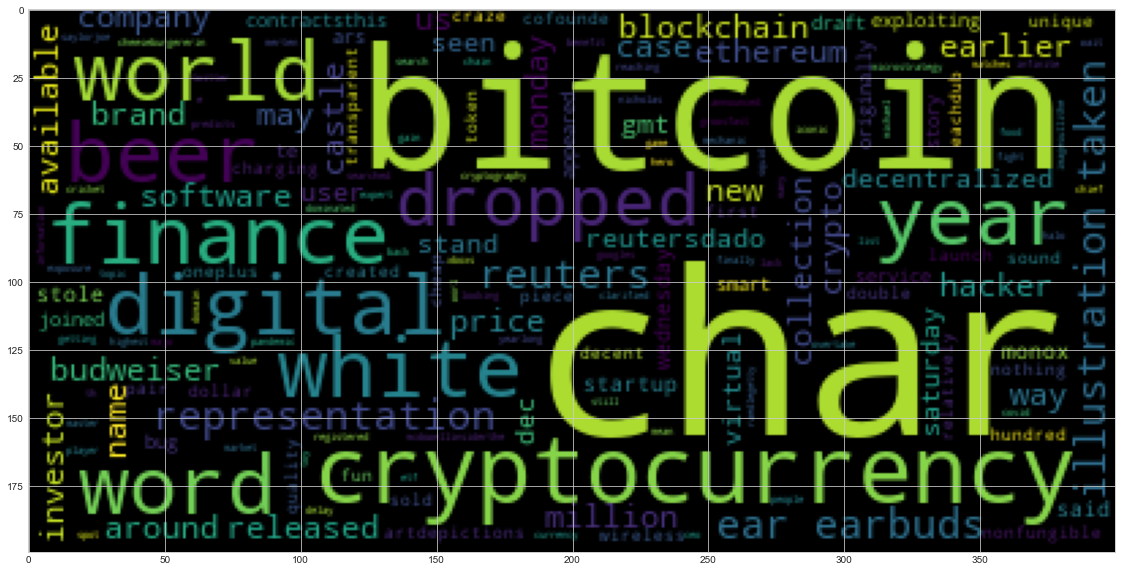

In [196]:
# Generate the Ethereum word cloud
eth_string = ' '.join(eth_corpus)
eth_input_words = process_text(eth_string)

eth_input = listToString(eth_input_words)
eth_wc = WordCloud().generate(eth_input)
plt.imshow(eth_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [197]:
import spacy
from spacy import displacy

In [198]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [199]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [200]:
# Concatenate all of the Bitcoin text together
btc_input

'image source afp via getty imagesimage caption modi ha ha million twitter followersindian prime minister narendra modis twitter account wa hacked message saying india ha char plant opening northeast niagara falls month somerset ny part million project terawulf bitcoin mining company project also includes proposed megawatt char earlier year nothing released pair relatively cheap ear earbuds fun transparent case wireless charging decent sound quality company created oneplus cofounde char dec reuters us securities exchange commission vetoed two proposal offer bitcoin exchangetraded fund dealing blow market participant hoped agency would green char people arent done hijacking major politician twitter account financial gain techcrunch report intruder temporarily seized control indian prime minister narendra modis twitter account char representation cryptocurrency bitcoin seen illustration taken november reutersdado ruvicillustrationdec reuters bitcoin rose sunday reclaim level char reuters

In [201]:
# Run the NER processor on all of the text
btc_doc = nlp(btc_input)

# Add a title to the document
btc_doc

image source afp via getty imagesimage caption modi ha ha million twitter followersindian prime minister narendra modis twitter account wa hacked message saying india ha char plant opening northeast niagara falls month somerset ny part million project terawulf bitcoin mining company project also includes proposed megawatt char earlier year nothing released pair relatively cheap ear earbuds fun transparent case wireless charging decent sound quality company created oneplus cofounde char dec reuters us securities exchange commission vetoed two proposal offer bitcoin exchangetraded fund dealing blow market participant hoped agency would green char people arent done hijacking major politician twitter account financial gain techcrunch report intruder temporarily seized control indian prime minister narendra modis twitter account char representation cryptocurrency bitcoin seen illustration taken november reutersdado ruvicillustrationdec reuters bitcoin rose sunday reclaim level char reuters 

In [202]:
# Render the visualization
displacy.render(btc_doc, style='ent')

In [203]:
# List all Entities
btc_entities = [ent.text for ent in btc_doc.ents]
btc_entities

['narendra',
 'india',
 'million',
 'terawulf',
 'earlier year',
 'reuters us securities exchange commission',
 'two',
 'indian',
 'narendra',
 'november',
 'reuters',
 'sunday',
 'reuters',
 'monday',
 'florida',
 'half',
 'december',
 'earlier year',
 'reuters',
 'saturday',
 'fifth',
 'saturday',
 'nearly billion dollar',
 'fifth',
 'saturday',
 'nearly billion dollar',
 'reuters',
 'gmt friday',
 'october',
 'reuters',
 'almost monday start week',
 'weekend',
 'one',
 'fifth',
 'week',
 'florida',
 'half',
 'week',
 'florida',
 'half',
 'cia',
 'last week',
 'every minute',
 'revealedgettya',
 'monday']

---

### Ethereum NER

In [204]:
# Concatenate all of the Ethereum text together
eth_input

'blockchain startup monox finance said wednesday hacker stole million exploiting bug software service us draft smart contractsthis story originally appeared ars te char monday budweiser joined nonfungible token craze launch first collection unique piece digital artdepictions beer sold hundred dollar eachdub char earlier year nothing released pair relatively cheap ear earbuds fun transparent case wireless charging decent sound quality company created oneplus cofounde char white castle double cheeseburgererin mcdowellinsiderthe list name brand getting crypto growsfast food chain white castle announced twitter registered domain name th char nicholas merten expert cryptography predicts digital currency ethereum overtake bitcoin market reaching highest value since may clarified e char people around world still searched information covid pandemic topic dominated googles year search like cricket squid game matches worl char wait finally yearlong delay xboxs iconic hero master chief back halo 

In [205]:
# Run the NER processor on all of the text
eth_doc = nlp(eth_input)

# Add a title to the document
eth_doc

blockchain startup monox finance said wednesday hacker stole million exploiting bug software service us draft smart contractsthis story originally appeared ars te char monday budweiser joined nonfungible token craze launch first collection unique piece digital artdepictions beer sold hundred dollar eachdub char earlier year nothing released pair relatively cheap ear earbuds fun transparent case wireless charging decent sound quality company created oneplus cofounde char white castle double cheeseburgererin mcdowellinsiderthe list name brand getting crypto growsfast food chain white castle announced twitter registered domain name th char nicholas merten expert cryptography predicts digital currency ethereum overtake bitcoin market reaching highest value since may clarified e char people around world still searched information covid pandemic topic dominated googles year search like cricket squid game matches worl char wait finally yearlong delay xboxs iconic hero master chief back halo i

In [206]:
# Render the visualization
displacy.render(eth_doc, style='ent')

In [207]:
# List all Entities
eth_entities = [ent.text for ent in eth_doc.ents]
eth_entities

['wednesday',
 'stole million',
 'monday',
 'first',
 'hundred dollar',
 'earlier year',
 'year',
 'michael saylorjoe',
 'december',
 'earlier year',
 'british institute',
 'saturday',
 'weekend',
 'june',
 'char budweiser',
 'monday',
 'october',
 'reuters',
 'reuters',
 'saturday',
 'november',
 'reuters',
 'sunday']

---